# Importing libraries and setting dataset path

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pickle

In [2]:
pwd

'E:\\Desktop\\semester 12\\CVAPR\\CIFAR -10'

In [3]:
DATASET = 'train_sep'

In [4]:
CATEGORIES = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Reading images and specifying category for each image

In [5]:
train_data = []
IMG_SIZE = 100

for c in CATEGORIES:
    path = os.path.join(DATASET, c)
    
    class_name = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        try:
            img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            img_resized = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
            train_data.append([img_resized, class_name])
        except Exception as e:
            pass

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:06<00:00, 768.60it/s]


In [6]:
len(train_data)

50000

In [7]:
#shuffling data as images are read category wise.
import random
random.shuffle(train_data)

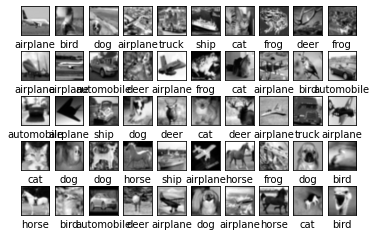

In [8]:
#testing if class name is displayed correctly and image is read correctly using the first 50 images after shuffling
for i in range(50):
    plt.subplot(5,10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_data[i][0], cmap=plt.cm.gray)
    plt.xlabel(CATEGORIES[train_data[i][1]])
    
plt.show()

In [9]:
X = []
y = []

for f,l in train_data:
    X.append(f)
    y.append(l)

In [10]:
print(X[0].shape)
tmp = X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(tmp.shape)

(100, 100)
(1, 100, 100, 1)


In [11]:
X = np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE, 1)
print(X.shape)

(50000, 100, 100, 1)


In [12]:
train_1 = X[0:40000]
val_1 = X[40000:50000]

print(len(train_1), len(val_1))

40000 10000


# Validation of first fold

In [14]:
# In this code, each of the images in the validation set is compared with the reamaining 40,000 images 
# and the L1 distance is calculated. Then from each set of 40,000 distances, the minimum one is extracted,
# saved in another array and popped from the set in order to find the next minimum. In this way 20 smallest distance indexes
# are stored for each of the 10,000 images in the validation set.
res = []
for i in tqdm(range(len(val_1))):
    
    arr = []
    arr2 = []
    for j,k in enumerate(train_1):
        dist_arr = np.abs(val_1[i] - k) 
        dist = np.sum(dist_arr) # mathatten / L1 distance
        arr.append(dist)    
    for k in range(1, 21, 1):
        minIndex = np.argmin(arr)
        arr2.append(minIndex)
        arr.pop(minIndex)
    res.append([arr2]) 
    

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [13:55:20<00:00,  5.01s/it]


In [23]:
res = np.array(res)
print(res.shape)

(10000, 1, 20)


In [25]:
#Saving data for future use.
pout = open("F1.pickle","wb")
pickle.dump(res, pout)
pout.close()

In [27]:
pin = open("F1.pickle","rb")
f1 = pickle.load(pin)

In [29]:
print(f1[0], len(f1))

[[22845 25271 22489 34626 32217 36030 19202  9805 17295 17383   160 32449
  33756 24551 31748 25755 14476 15163  2313 24488]] 10000


In [31]:
train_2 = X[10000:50000]
val_2 = X[0:10000]

In [32]:
print(len(train_2), len(val_2))

40000 10000


# Validation for second fold

In [33]:
#same procedure applied as before.
res = []
for i in tqdm(range(len(val_2))):
    
    arr = []
    arr2 = []
    for j,k in enumerate(train_2):
        dist_arr = np.abs(val_2[i] - k) 
        dist = np.sum(dist_arr) # mathatten / L1 distance
        arr.append(dist)    
    for k in range(1, 21, 1):
        minIndex = np.argmin(arr)
        arr2.append(minIndex)
        arr.pop(minIndex)
    res.append([arr2]) 

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [13:40:33<00:00,  4.92s/it]


In [40]:
res = np.array(res)
print(res.shape)

(10000, 1, 20)


In [43]:
#Saving for future use
pout = open("F2.pickle","wb")
pickle.dump(res, pout)
pout.close()

In [44]:
print(f1[0], len(f1))

[[22845 25271 22489 34626 32217 36030 19202  9805 17295 17383   160 32449
  33756 24551 31748 25755 14476 15163  2313 24488]] 10000


In [45]:
pin = open("F2.pickle","rb")
f2 = pickle.load(pin)

In [46]:
print(f2[0], len(f2))

[[30213  8872 17454 11170 22088 27036 30384 12626  9050  2277 31069 31786
    654 11915  2517 19041 23162 10781 21718 39494]] 10000


In [47]:
pout = open("F1.pickle","wb")
pickle.dump(f1, pout)
pout.close()

In [48]:
pin = open("F1.pickle","rb")
f11 = pickle.load(pin)

In [50]:
print(f11[0], len(f11))

[[22845 25271 22489 34626 32217 36030 19202  9805 17295 17383   160 32449
  33756 24551 31748 25755 14476 15163  2313 24488]] 10000


In [52]:
val_3 = X[30000:40000]
train_3 = X[0:30000]
t_3 = X[40000:50000]

print(len(val_3), len(train_3), len(t_3))

10000 30000 10000


In [53]:
pout = open("X.pickle","wb")
pickle.dump(X, pout)
pout.close()

In [54]:
pout = open("y.pickle","wb")
pickle.dump(y, pout)
pout.close()

# Calulating accuracy for fold one

In [131]:
# First, the distance index is converted to category using y value stored earlier.
# Then, Counter is used to find the most occuring category for each array stored previously, taking k=1 to k=20.

# There is an error in this code which is solved later.
#f1_l = [CATEGORIES[x] for x in f1[0]]
from collections import Counter
l_1 = y[0:40000]
labels_1 = []
for i,x in tqdm(enumerate(f1)):
    l1 = [l_1[z] for z in x[0]]
    l11 = []
    for k in range(1, 21, 1):
        l11.append(Counter(l1[0:k]).most_common()[0][0])
    labels_1.append(l11)
    l1 = []

print(len(labels_1))

10000it [00:04, 2353.68it/s]

10000


In [132]:
# the most common category is then compared with the actual category of the image and the number of correct classifications
# are stored for k=1 to k=20.
y_1 = y[40000:50000]
c = 0
acc = []
for k in tqdm(range(1,21,1)):
    for i, x in enumerate(labels_1):
        if x[k-1]==y_1[i]:
            c += 1
    a = (c/10000)*100
    acc.append(a)
    c = 0
print(len(acc))

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 114.93it/s]

20


In [135]:
# The calculated values are slightly lower than the ones in the graph provided from CVAPR slide 1.
accuracy = []
print(acc, np.argmax(acc))
accuracy.append([acc])

[23.13, 23.13, 22.58, 22.05, 20.91, 20.23, 19.96, 19.98, 19.66, 19.32, 19.09, 18.38, 18.35, 18.0, 18.16, 18.21, 18.240000000000002, 18.12, 17.98, 17.849999999999998] 0


In [137]:
# Same is done for fold 2
l_2 = y[10000:50000]
labels_2 = []
for i,x in tqdm(enumerate(f2)):
    l2 = [l_1[z] for z in x[0]]
    l22 = []
    for k in range(1, 21, 1):
        l22.append(Counter(l2[0:k]).most_common()[0][0])
    labels_2.append(l11)
    l2 = []

print(len(labels_2))

10000it [00:04, 2355.33it/s]

10000


In [138]:
y_2 = y[0:40000]
c = 0
acc = []
for k in tqdm(range(1,21,1)):
    for i, x in enumerate(labels_2):
        if x[k-1]==y_2[i]:
            c += 1
    a = (c/10000)*100
    acc.append(a)
    c = 0
print(len(acc))

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 130.94it/s]

20


In [139]:
# Again, accuracy values are lower than those shown in slide.
accuracy.append([acc])
print(acc, np.argmax(acc), len(accuracy))

[10.0, 10.0, 10.0, 10.0, 9.59, 9.59, 9.59, 9.59, 9.59, 9.59, 10.24, 10.24, 10.24, 10.24, 10.24, 10.24, 10.2, 10.2, 10.2, 10.2] 10 2


In [146]:
accuracy = np.array(accuracy)
print(accuracy.shape, accuracy)

(2, 1, 20) [[[23.13 23.13 22.58 22.05 20.91 20.23 19.96 19.98 19.66 19.32 19.09
   18.38 18.35 18.   18.16 18.21 18.24 18.12 17.98 17.85]]

 [[10.   10.   10.   10.    9.59  9.59  9.59  9.59  9.59  9.59 10.24
   10.24 10.24 10.24 10.24 10.24 10.2  10.2  10.2  10.2 ]]]


In [140]:
pout = open("Accuracy.pickle","wb")
pickle.dump(accuracy, pout)
pout.close()

In [123]:
train_3 = []
train_3 = np.append(X[0:30000], X[40000:50000], axis=0)
val_3 = X[30000:40000]
print(len(train_3), len(val_3), train_3.shape)

40000 10000 (40000, 100, 100, 1)


In [147]:
pin = open("Accuracy.pickle","rb")
accuracy_1 = pickle.load(pin)
print(len(accuracy_1), accuracy_1)

2 [[[23.13, 23.13, 22.58, 22.05, 20.91, 20.23, 19.96, 19.98, 19.66, 19.32, 19.09, 18.38, 18.35, 18.0, 18.16, 18.21, 18.240000000000002, 18.12, 17.98, 17.849999999999998]], [[10.0, 10.0, 10.0, 10.0, 9.59, 9.59, 9.59, 9.59, 9.59, 9.59, 10.24, 10.24, 10.24, 10.24, 10.24, 10.24, 10.2, 10.2, 10.2, 10.2]]]


In [1]:
import numpy as np
from tqdm import tqdm
import pickle

In [2]:
pin = open("X.pickle","rb")
X = pickle.load(pin)

pin = open("y.pickle","rb")
y = pickle.load(pin)

In [3]:
print(X.shape, type(X))

(50000, 100, 100, 1) <class 'numpy.ndarray'>


In [4]:
train_3 = []
train_3 = np.append(X[0:30000], X[40000:50000], axis=0)
val_3 = X[30000:40000]
print(len(train_3), len(val_3), train_3.shape)

40000 10000 (40000, 100, 100, 1)


In [ ]:
# Further testing done with data
res = []
for i in tqdm(range(len(val_3))):
    
    arr = []
    arr2 = []
    for j,k in enumerate(train_3):
        dist_arr = np.abs(val_3[i] - k) 
        dist = np.sum(dist_arr) # mathatten / L1 distance
        arr.append(dist)    
    for k in range(1, 21, 1):
        minIndex = np.argmin(arr)
        arr2.append(minIndex)
        arr.pop(minIndex)
    res.append([arr2]) 

In [19]:
print(res)

[[[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]]]
